<a href="https://colab.research.google.com/github/CSCCNY/final-project-recomposeclassics/blob/main/03_CNN_Product_Audio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Recompose Classics : **Run Final CNN Model**
Hannah Do

May 7th, 2021



---


##### **Summary**

1. **Run CNN Model with best performance** from '02_Spectogram_CNN.ipynb' to optimal epochs


2. **Produce Predict Numpy array**, evaluate with Actual array 
    
    -> Compare y_pred and y_test Spectograms


3. **Play Spectograms**
    
    -> save as Audio files to hear differences by ear


---

**Mount from Google Drive**

In [5]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


## **Run Third CNN Model**
Test data : 788 images with input shape (400, 400, 3)
Test data : 197 images with input shape (400, 400, 3)

In [1]:
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

import numpy as np

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Reshape
from keras.layers import Conv2D, Conv2DTranspose, MaxPool2D, LeakyReLU
from keras.utils import np_utils

from keras import backend as K

In [8]:
x_train = np.load("/Users/SAMSUNG/Downloads/dnn_data/x_train.npy")
y_train = np.load("/Users/SAMSUNG/Downloads/dnn_data/y_train.npy")
x_test = np.load("/Users/SAMSUNG/Downloads/dnn_data/x_test.npy")
y_test = np.load("/Users/SAMSUNG/Downloads/dnn_data/y_test.npy")

In [9]:
x_train = np.expand_dims(x_train, -1)
y_train = np.expand_dims(y_train, -1)
x_test = np.expand_dims(x_test, -1)
y_test = np.expand_dims(y_test, -1)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1275, 128, 646, 1),
 (1275, 128, 646, 1),
 (158, 128, 646, 1),
 (158, 128, 646, 1))

In [23]:

model = Sequential()

model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(128, 646, 1)))

# convolutional layer
model.add(Conv2D(40, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2DTranspose(20, (4,4), strides=(2,2), padding='same'))
model.add(LeakyReLU(alpha=0.2))

model.add(Conv2D(20, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2DTranspose(40, (4,4), strides=(2,2), padding='same'))
model.add(LeakyReLU(alpha=0.2))
model.add(Dropout(0.25))

# output layer
model.add(Dense(1, activation='linear'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 128, 646, 25)      250       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 128, 646, 40)      9040      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 64, 323, 40)       0         
_________________________________________________________________
conv2d_transpose_8 (Conv2DTr (None, 128, 646, 20)      12820     
_________________________________________________________________
leaky_re_lu_11 (LeakyReLU)   (None, 128, 646, 20)      0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 128, 646, 20)      3620      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 64, 323, 20)      

In [24]:
# compiling the sequential model
model.compile(loss='mse', metrics=['mae'], optimizer='adam')

# training the model
history= model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
40/40 [==============================] - 193s 5s/step - loss: 984.2115 - mae: 24.0214 - val_loss: 171.9243 - val_mae: 9.4192
Epoch 2/10
40/40 [==============================] - 195s 5s/step - loss: 177.4709 - mae: 10.2268 - val_loss: 154.8727 - val_mae: 8.8556
Epoch 3/10
40/40 [==============================] - 195s 5s/step - loss: 157.1109 - mae: 9.5958 - val_loss: 151.5373 - val_mae: 8.7738
Epoch 4/10
40/40 [==============================] - 194s 5s/step - loss: 146.3292 - mae: 9.2667 - val_loss: 150.5757 - val_mae: 8.7666
Epoch 5/10
40/40 [==============================] - 195s 5s/step - loss: 138.5113 - mae: 9.0236 - val_loss: 147.6906 - val_mae: 8.5729
Epoch 6/10
40/40 [==============================] - 195s 5s/step - loss: 132.8362 - mae: 8.8631 - val_loss: 146.7314 - val_mae: 8.4847
Epoch 7/10
40/40 [==============================] - 195s 5s/step - loss: 137.8341 - mae: 8.9276 - val_loss: 146.2215 - val_mae: 8.4605
Epoch 8/10
40/40 [==============================] - 1

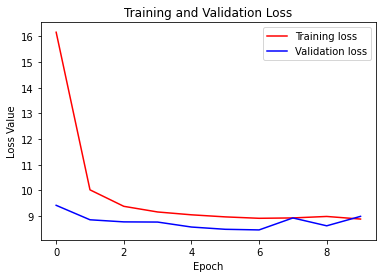

In [26]:
import matplotlib.pyplot as plt

epochs = 10
train_loss = history.history['mae']
val_loss = history.history['val_mae']

epochs = range(epochs)

plt.figure()
plt.plot(epochs, train_loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')

plt.legend()
plt.show()

In [27]:

model = Sequential()

model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(128, 646, 1)))

# convolutional layer
model.add(Conv2D(40, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2DTranspose(20, (4,4), strides=(2,2), padding='same'))
model.add(LeakyReLU(alpha=0.2))

model.add(Conv2D(20, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2DTranspose(40, (4,4), strides=(2,2), padding='same'))
model.add(LeakyReLU(alpha=0.2))
model.add(Dropout(0.25))

# output layer
model.add(Dense(1, activation='linear'))

model.summary()

# compiling the sequential model
model.compile(loss='mse', metrics=['mae'], optimizer='adam')

# training the model
history= model.fit(x_train, y_train, epochs=7, validation_data=(x_test, y_test))

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 128, 646, 25)      250       
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 128, 646, 40)      9040      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 64, 323, 40)       0         
_________________________________________________________________
conv2d_transpose_10 (Conv2DT (None, 128, 646, 20)      12820     
_________________________________________________________________
leaky_re_lu_13 (LeakyReLU)   (None, 128, 646, 20)      0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 128, 646, 20)      3620      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 64, 323, 20)      

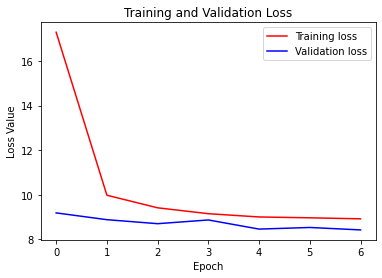

In [28]:
import matplotlib.pyplot as plt

epochs = 7
train_loss = history.history['mae']
val_loss = history.history['val_mae']

epochs = range(epochs)

plt.figure()
plt.plot(epochs, train_loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')

plt.legend()
plt.show()

### Use the trained model to predict following sequence : output specto array

In [30]:
y_pred = model.predict(y_test)

In [76]:
np.save("/Users/SAMSUNG/Downloads/dnn_data/predicted_output_CNN", y_pred)

In [32]:
! pip install librosa

In [35]:
y_pred[0].shape

(128, 646, 1)

- reshape the array for mel_spectogram conversion

In [53]:
y2 = y_pred[20].reshape(128,646)

y2.shape

(128, 646)

In [52]:
yt2 = y_test[20].reshape(128,646)

yt2.shape

(128, 646)

- Use Librosa inverse.mel_to_audio to convert the arrays into audio

In [ ]:
import librosa
from scipy.io.wavfile import write

In [56]:

audio_path = '/Users/SAMSUNG/Downloads/y2.wav'

sr = 44100
wav = librosa.db_to_power(y2, ref=1.0)
wav = librosa.feature.inverse.mel_to_audio (M=wav, hop_length=512, sr=sr)
#scipy.io.wavfile.write (audio_path, 16000, wav.astype(np.int16))
write (audio_path, sr, wav.astype(np.float32))

In [55]:

audio_path = '/Users/SAMSUNG/Downloads/yt10.wav'

sr = 44100
wav = librosa.db_to_power(yt10, ref=1.0)
wav = librosa.feature.inverse.mel_to_audio (M=wav, hop_length=512, sr=sr)
#scipy.io.wavfile.write (audio_path, 16000, wav.astype(np.int16))
write (audio_path, sr, wav.astype(np.float32))

- Play the converted audio

In [69]:
! pip install pygame

In [78]:
import pygame

- **Original audio segment** : run the cell below to play the sequence

In [92]:
pygame.mixer.init()
my_sound = pygame.mixer.Sound('results/y_test20_CNN.wav')
my_sound.play()
pygame.time.wait(int(my_sound.get_length() * 1000))

7488

- **Predicted audio segment** : definitely has noise added in, however the rhythm and dim memory can be heard

In [91]:
pygame.mixer.init()
my_sound = pygame.mixer.Sound('results/y_pred20_CNN.wav')
my_sound.play()
pygame.time.wait(int(my_sound.get_length() * 1000))

7489

### The output sequences (y_test and y_pred) in spectograms

In [85]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img

- **Original audio segment**

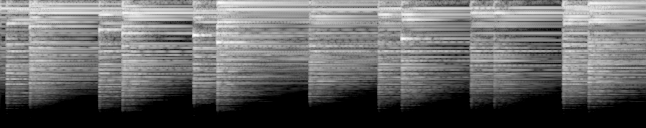

In [86]:
img_array = array_to_img(y_test[0])
img_array

- **Predicted audio segment** : dim-faded version of the original, however conserves rhythm and basic color concentrations

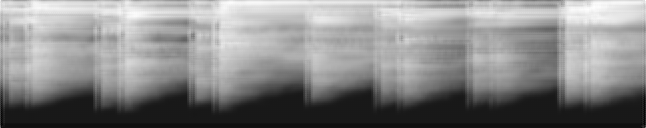

In [87]:
img_array = array_to_img(y_pred[0])
img_array

<class 'numpy.ndarray'> <class 'int'>
(330240,) 44100


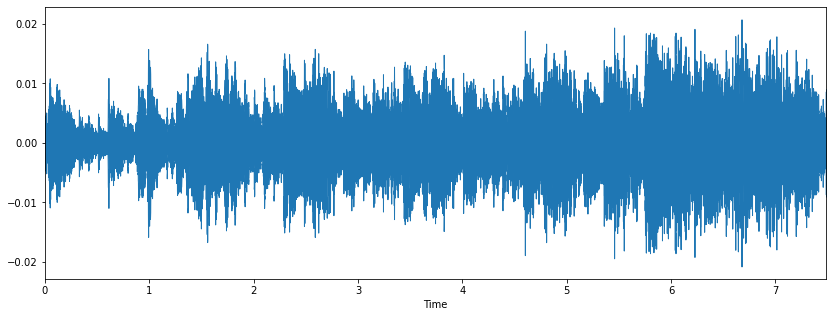

In [4]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

x, sr = librosa.load('results/y_test20_CNN.wav', sr=44100)

print(type(x), type(sr))
print(x.shape, sr)

plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

<class 'numpy.ndarray'> <class 'int'>
(330240,) 44100


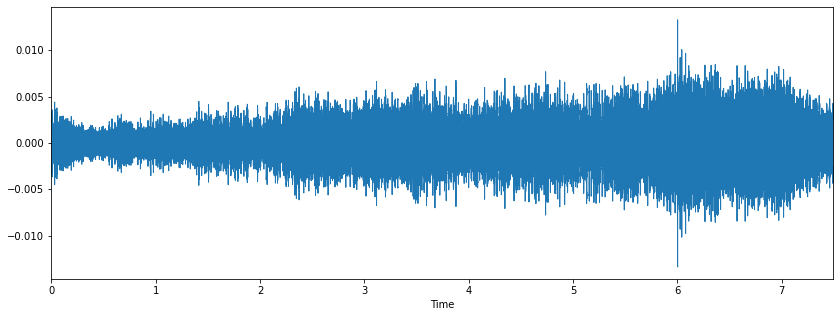

In [5]:
x, sr = librosa.load('results/y_pred20_CNN.wav', sr=44100)

print(type(x), type(sr))
print(x.shape, sr)

plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)